In [5]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
tabela = pd.read_csv(r'')#path to the csv file

display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
print(tabela.corr())

              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0.901208  0.349631  0.157960  1.000000


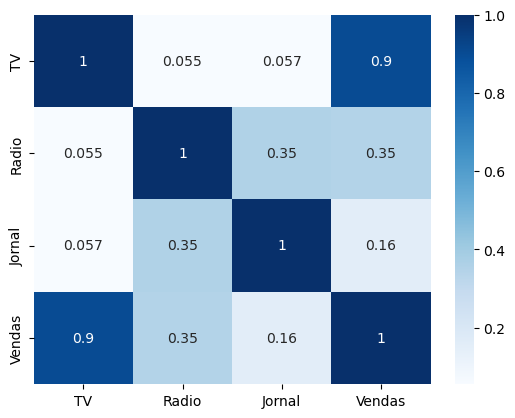

In [12]:
sns.heatmap(tabela.corr(), cmap = 'Blues', annot = True)

plt.show()

In [54]:
x = tabela[['TV' , 'Radio' , 'Jornal']]
y = tabela['Vendas']

xTreino , xTeste , yTreino , yTeste = train_test_split(x , y , test_size=0.4)

In [55]:
modeloRegressaoLinear = LinearRegression()
modeloArvoreDecisao = RandomForestRegressor()

modeloRegressaoLinear.fit(xTreino , yTreino)
modeloArvoreDecisao.fit(xTreino, yTreino)

RandomForestRegressor()

In [56]:
previsaoRegressaoLinear = modeloRegressaoLinear.predict(xTeste)
previsaoArvoreDecisao = modeloArvoreDecisao.predict(xTeste)

print(r2_score(yTeste, previsaoRegressaoLinear))
print(r2_score(yTeste, previsaoArvoreDecisao))

0.9018075266518605
0.9477247190117006


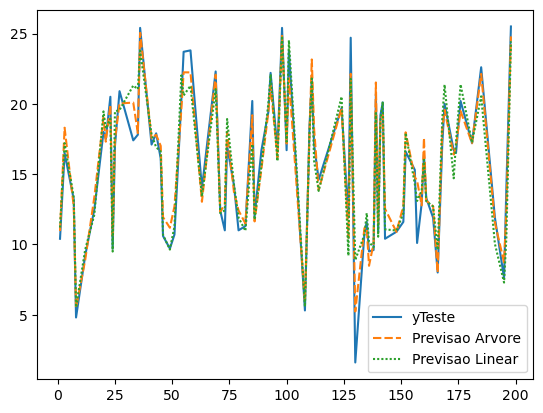

In [58]:
tabelaAuxiliar = pd.DataFrame()
tabelaAuxiliar['yTeste'] = yTeste
tabelaAuxiliar['Previsao Arvore'] = previsaoArvoreDecisao
tabelaAuxiliar['Previsao Linear'] = previsaoRegressaoLinear

sns.lineplot(data=tabelaAuxiliar)
plt.show()

In [63]:
novaTabela = pd.read_excel(r'')#path to where you want to save the new csv file
display(novaTabela)

,TV,Radio,Jornal
0,42,86,100
1,23,38,81
2,79,44,97
3,72,45,6
4,15,27,60
5,6,94,77
6,87,56,64


In [64]:
previsao = modeloArvoreDecisao.predict(novaTabela)
print(previsao)

[11.241  8.959 14.017 13.525  7.682  7.118 14.13 ]
